## Введение
**Описание проекта**

Заказчик этого исследования — Министерство культуры Российской Федерации. 
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

## Исследование данных о российском кинопрокате

## Research of films

### Шаг 1. Открытие файлов с данными и объединение их в один датафрейм. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#чтение датасетов

pth1_movies = 'mkrf_movies.csv'
pth2_movies = '/datasets/mkrf_movies.csv'

if os.path.exists(pth1_movies):
    movies = pd.read_csv(pth1_movies)
elif os.path.exists(pth2_movies):
    movies = pd.read_csv(pth2_movies)
else:
    print('Something is wrong, что-то пошло не так')
    

    
pth1_shows = 'mkrf_shows.csv'
pth2_shows = '/datasets/mkrf_shows.csv'

if os.path.exists(pth1_shows):
    shows = pd.read_csv(pth1_shows)
elif os.path.exists(pth2_movies):
    shows = pd.read_csv(pth2_shows)
else:
    print('Something is wrong, что-то пошло не так')
    

In [3]:
#предварительный просмотр части данных
movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
#проверка дубликатов строк
movies.duplicated().sum()

0

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
#просмотр второй таблицы shows
shows.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [7]:
#проверка дубликатов строк
shows.duplicated().sum()

0

In [8]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [9]:
#изменение столбца на тип данных str
shows.puNumber = shows.puNumber.astype(str)

In [10]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [11]:
#проверка что все номера колонки puNumber из датасета shows есть в датасете movies
movies.puNumber.isin(shows.puNumber).sum()

3158

<div class="alert alert-block alert-warning">
    
Количество 3158 совпадает с количеством строк таблицы `shows`. Следовательно все номера `puNumber` из датасета `shows` есть в таблице `movies`
</div>

In [12]:
#соединение двух таблиц вместе, без потери данных

#так как все значения в колонке puNumber из датасета shows есть в датасете movies, 
#то по идее после обьединения размер выходной таблицы не изменится и будет 7486 строк
df = movies.merge(shows, on='puNumber', how = 'outer')


In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [14]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-block alert-warning">
    
В результате объединения появился дополнительный столбец `box_office` в конце таблицы.
</div>

In [15]:
#просмотр статист информации столбца puNumber
df.puNumber.describe()

count          7486
unique         7484
top       221054410
freq              2
Name: puNumber, dtype: object

In [16]:
#просмотр уникальных значений столбца type
df.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [17]:
#просмотр уникальных значений столбца production_country
sorted(df.production_country.astype(str).unique())

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'nan',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Гер

In [18]:
#просмотр уникальных значений столбца director
sorted(df.director.astype(str).unique())

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'nan',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Басае

In [19]:
#просмотр уникальных значений столбца producer
sorted(df.producer.astype(str).unique())

[' А.Шальопа',
 ' Г.Шпригов',
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
 ' И.Гелашвили',
 ' К.Шахназаров, А.Златопольский',
 ' Мишель Чиджик, Джефф Абберли, Натали Марисано',
 ' ООО "Арт Пикчерс Студия"',
 ' ООО "Арт Пикчерс Студия", ФГУП "ВГТРК"',
 ' ООО "КиноФирма"',
 ' ФГУП "Киноконцерн "Мосфильм"',
 '"Фонд Михаила Калатозова"',
 'nan',
 'Ёсиаки Нисимура, Джеффри Уэкслер',
 'А. Калюжный',
 'А. Натахин',
 'А.А.Эшпай',
 'А.Аболс',
 'А.Адамская',
 'А.Адраникян, В.Горяинов',
 'А.Ананикян',
 'А.Ананикян, Г.Андреасян, С.Андреасян',
 'А.Ананикян, С.Андреасян, Г.Андреасян',
 'А.Аствацатрян, С.Сельянов',
 'А.Атанесян, А.Кириллин, Л.Тарасов',
 'А.Атанесян, М.Бабаханов, Р.Бутко',
 'А.Атанесян, Р.Атоян',
 'А.Балашов',
 'А.Барыкин',
 'А.Барыкин, В.Братухин, О.Суров',
 'А.Басов',
 'А.Белов',
 'А.Берденников',
 'А.Бессчетнова, М.Евдокимова, А.Куренков',
 'А.Бзаров',
 'А.Бик, П.Бранкати, Ф.Будвег, М.де Конинг, П.А.Марион, Г.Мендеш, М.Ситер, 

In [20]:
#просмотр уникальных значений столбца age_restriction
df.age_restriction.unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [21]:
# проверка на целое число для столбцов с типом данных float64, исключая NaN. 

#Если ответ True - в столбце только целые числа, 
#Если в ответе есть False значит столбец содержит и дробные числа

columns_float64 = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office'] #список столбцов типа float64

for j in columns_float64:
    print(j, df[j].apply(lambda x: True if np.isnan(x) else x.is_integer()).unique())


refundable_support [ True]
nonrefundable_support [ True]
budget [ True]
box_office [ True False]


In [22]:
#просмотр уникальных значений столбца financing_source
df.financing_source.unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [23]:
#просмотр уникальных значений столбца ratings
df.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [24]:
#просмотр уникальных значений столбца genres
sorted(df.genres.astype(str).unique())

['nan',
 'аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,драм

In [25]:
#просмотр статист информации столбца box_office
df.box_office.describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

In [26]:
#просмотр пропущенных значений
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

<div class="alert alert-block alert-warning">
    
После объединения двух датасетов вместе, имеем итоговую таблицу 7486 строк и 16 столбцов, объем 10,2 Мб.
    

---  
    0   title                  7486 non-null   object  - пропусков нет 
    1   puNumber               7486 non-null   object  - пропусков нет, столбец имеет целочисленный значения
    2   show_start_date        7486 non-null   object  - пропусков нет, данные о дате записанные в строковом формате
    3   type                   7486 non-null   object  - пропусков нет
    4   film_studio            7468 non-null   object  - есть пропуски
    5   production_country     7484 non-null   object  - есть пропуски, и вместо названия страны производства
                                                         есть странные значения '2019', 'nan'
    6   director               7477 non-null   object  - есть пропуски, а так же пропуски в виде текста 'nan'
    7   producer               6918 non-null   object  - есть пропуски, а так же пропуски в виде текста 'nan'
    8   age_restriction        7486 non-null   object  - пропусков нет 
    9   refundable_support     332 non-null    float64 - есть пропуски, столбец содержит целые числа
    10  nonrefundable_support  332 non-null    float64 - есть пропуски, столбец содержит целые числа
    11  budget                 332 non-null    float64 - есть пропуски, столбец содержит целые числа
    12  financing_source       332 non-null    object - есть пропуски, данные нормальные
    13  ratings                6519 non-null   object - есть пропуски, 
                                               и кроме нормальных данных рейтинга есть записи в виде '94%','62%'
    14  genres                 6510 non-null   object - есть пропуски,  а так же пропуски в виде текста 'nan'
    15  box_office             3158 non-null   float64 - есть пропуски, в столбце есть и дробные числа.

    
</div>

### Шаг 2. Предобработка данных

<div class="alert alert-block alert-info">

<b>Преобразование типов данных в датафрейме там, где это необходимо. <b>

</div>

####  Проверить типы данных

Изучить пропуски в датафрейме

Изучите дубликаты в датафрейме

Изучить категориальные значения

In [27]:
#дубликаты не обнаружены ни в исходных ни в итоговом датафреймах

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [29]:
df.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [30]:
#проверка дубликатов строк и удаление их
df.duplicated().sum()

0

<div class="alert alert-block alert-info">
    
столбец `puNumber`, номер прокатного удостоверения
    
</div>

In [31]:
df.puNumber.sort_values(ascending=False)

1797           нет
5249     231001111
1011     231001012
3992     226019110
4355     226017410
           ...    
1128     111000113
729      111000112
4768     111000111
3962     111000110
804      111004112
Name: puNumber, Length: 7486, dtype: object

In [32]:
#удаление строк имеющих не числовые значения
df = df[df.puNumber.apply(lambda x: x.isnumeric())]

In [33]:
#изменение столбца puNumber на тип int
df['puNumber'] = df['puNumber'].astype(int)

In [34]:
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7484 non-null   object 
 1   puNumber               7484 non-null   int64  
 2   show_start_date        7484 non-null   object 
 3   type                   7484 non-null   object 
 4   film_studio            7466 non-null   object 
 5   production_country     7482 non-null   object 
 6   director               7475 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7484 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [35]:
#проверка
df.puNumber.head()

0    221048915
1    111013716
2    221038416
3    221026916
4    221030815
Name: puNumber, dtype: int64

In [36]:
#для int32 число максимум 2 147 483 647
df.puNumber.max()

231001111

In [37]:
#замена на int32
df.puNumber = df.puNumber.astype('Int32')

In [38]:
#проверка
df.puNumber.head()

0    221048915
1    111013716
2    221038416
3    221026916
4    221030815
Name: puNumber, dtype: Int32

<div class="alert alert-block alert-info">
    
столбец `show_start_date`, дата премьеры фильма
    
</div>

In [39]:
#изменение столбца на тип данных datetime
df.show_start_date.head(2)

0    2015-11-27T12:00:00.000Z
1    2016-09-13T12:00:00.000Z
Name: show_start_date, dtype: object

In [40]:
df.show_start_date = pd.to_datetime(df.show_start_date, format='%Y-%m-%dT%H:%M:%S')

In [41]:
#проверка
df.show_start_date.tail(1)

7485   2019-12-30 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

<div class="alert alert-block alert-info">
    
столбец `type`, тип фильма. 
    
    
</div>

In [42]:
df.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [43]:
df.loc[df['type'] == ' Художественный', 'type'] = 'Художественный'

In [44]:
df.loc[df['type'] == ' Анимационный', 'type'] = 'Анимационный'

In [45]:
#проверка
df.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

<div class="alert alert-block alert-info">
    
столбец `production_country`, страна-производитель. 
    
</div>

<div class="alert alert-block alert-info">
    
столбец `director`, режиссёр. 
    
    
</div>

In [46]:
#замена 'nan' на 'unknow'

In [47]:
df.director = df.director.fillna('unknow')

In [48]:
sorted(df.director.astype(str).unique())

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'unknow',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Ба

In [49]:
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   Int32              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7466 non-null   object             
 5   production_country     7482 non-null   object             
 6   director               7484 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

<div class="alert alert-block alert-info">
    
столбец `producer`, продюсер.

</div>

<div class="alert alert-block alert-info">
    
столбец `age_restriction`, возрастная категория.  
    
</div>

In [50]:
df.age_restriction.unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

<div class="alert alert-block alert-warning">
Замена на сокращённое название, для удобства дальнейшего использования.
    
`«12+» - для детей старше 12 лет` - на `12+`
    
`«16+» - для детей старше 16 лет` - на `16+`
    
и т.д.

In [51]:
#функция для замены
def change_age(value):
    if '0+' in value:
        return '0+'
    elif '16+' in value:
        return '16+'
    elif '12+' in value:
        return '12+'
    elif '6+' in value:
        return '6+'
    if '18+' in value:
        return '18+'

In [52]:
#проверка функции
change_age('«16+» - для детей старше 12 лет')

'16+'

In [53]:
df.age_restriction = df.age_restriction.apply(change_age)

In [54]:
#поверка
df.age_restriction.unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

<div class="alert alert-block alert-info">
    
изменение типов данных  для столбцов 
    
`refundable_support` на `Int32`
    
`nonrefundable_support` на `Int32`
    
`budget` на `Int64`
    
</div>

In [55]:
df.refundable_support.max()
#180 000 000

180000000.0

In [56]:
df.nonrefundable_support.max()
#400 000 000

400000000.0

In [57]:
df.budget.max()
#2 305 074 303

2305074303.0

In [58]:
df[['refundable_support','nonrefundable_support']] = (
    df[['refundable_support','nonrefundable_support']]
    .astype('Int32')
)

In [59]:
df.budget = df.budget.astype('Int64')


In [60]:
#проверка
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   Int32              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7466 non-null   object             
 5   production_country     7482 non-null   object             
 6   director               7484 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    Int32              
 10  nonrefundable_support  332 non-null    Int32              
 11  budget                 332 non-null    Int64            

<div class="alert alert-block alert-info">
    
столбец `refundable_support`, объём возвратных средств государственной поддержки.  
    
</div>

In [61]:
df.refundable_support

0       <NA>
1       <NA>
2       <NA>
3       <NA>
4       <NA>
        ... 
7481    <NA>
7482    <NA>
7483    <NA>
7484    <NA>
7485    <NA>
Name: refundable_support, Length: 7484, dtype: Int32

In [62]:
df.refundable_support.describe()

count              332.0
mean     11864457.831325
std      24916555.263644
min                  0.0
25%                  0.0
50%                  0.0
75%           15000000.0
max          180000000.0
Name: refundable_support, dtype: Float64

<Axes: >

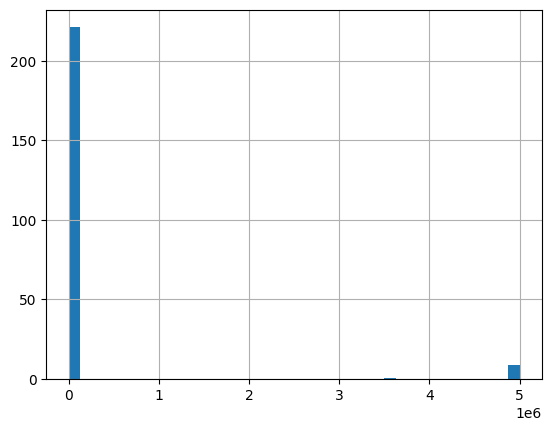

In [63]:
#просмотр начала диапазона
df.refundable_support.hist(bins=40, range=(0, 5e6))

<Axes: >

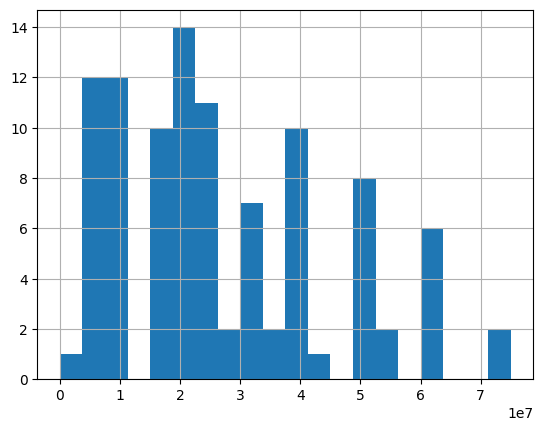

In [64]:
#просмотр диапазона исключая нулевые значения
df.query('refundable_support > 0').refundable_support.hist(bins=20, range=(0, 75e6))

In [65]:
df.query('refundable_support == 0').count()

title                    221
puNumber                 221
show_start_date          221
type                     221
film_studio              221
production_country       221
director                 221
producer                 220
age_restriction          221
refundable_support       221
nonrefundable_support    221
budget                   221
financing_source         221
ratings                  208
genres                   208
box_office               209
dtype: int64

In [66]:
df.refundable_support.isna().sum()

7152

<div class="alert alert-block alert-warning">

В столбце 7152 пропущенных значений.
    
Из 332-х не `nan` значений, 221-но значение равны нулю.
    
То есть большая часть данных в этом столбце либо отсутствуют либо равны нулю.
    
Заполнять пропущенные данные медианой или средним нельзя, потому что велика вероятность ошибки при дальнейшем анализе.
    
Скорее всего пропущенные и нулевые данные просто неизвестны.

<div class="alert alert-block alert-info">
    
столбец `nonrefundable_support`, объём невозвратных средств государственной поддержки.  
    
</div>

In [67]:
df.nonrefundable_support.describe()

count              332.0
mean     48980988.891566
std      59980117.923301
min                  0.0
25%           25000000.0
50%           30000000.0
75%           40375000.0
max          400000000.0
Name: nonrefundable_support, dtype: Float64

In [68]:
#пропущенные значения
df.nonrefundable_support.isna().sum()

7152

In [69]:
df.query('nonrefundable_support == 0').count()

title                    9
puNumber                 9
show_start_date          9
type                     9
film_studio              9
production_country       9
director                 9
producer                 9
age_restriction          9
refundable_support       9
nonrefundable_support    9
budget                   9
financing_source         9
ratings                  9
genres                   9
box_office               9
dtype: int64

<Axes: >

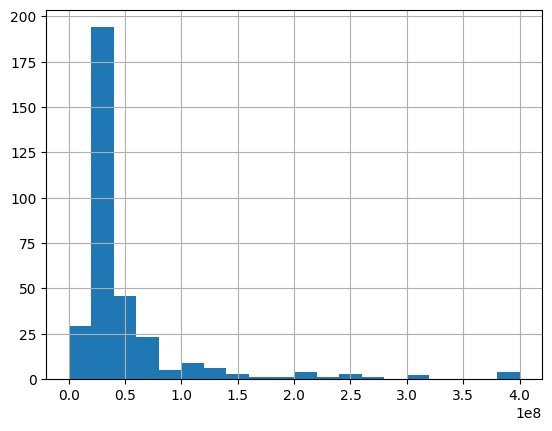

In [70]:
df.nonrefundable_support.hist(bins=20)

<div class="alert alert-block alert-warning">

В столбце 7152 пропущенных значений.
    
Из 332-х не `nan` значений, 9 значений равны нулю.
    
Так же как и в педыдущем столбце заполнять пропущенные данные медианой или средним нельзя, потому что велика вероятность ошибки при дальнейшем анализе.
    
Скорее всего пропущенные и нулевые данные просто неизвестны.

<div class="alert alert-block alert-info">
    
столбец `budget`, общий бюджет фильма.  
    
</div>

In [71]:
df.budget.describe()

count               332.0
mean     127229716.683735
std      188588333.115158
min                   0.0
25%            42000000.0
50%            68649916.0
75%           141985319.5
max          2305074303.0
Name: budget, dtype: Float64

In [72]:
#количество пропущенных значений
df.budget.isna().sum()

7152

In [73]:
#количество ячеек со значением ноль
df.query('budget == 0')['budget'].count()

17

<Axes: >

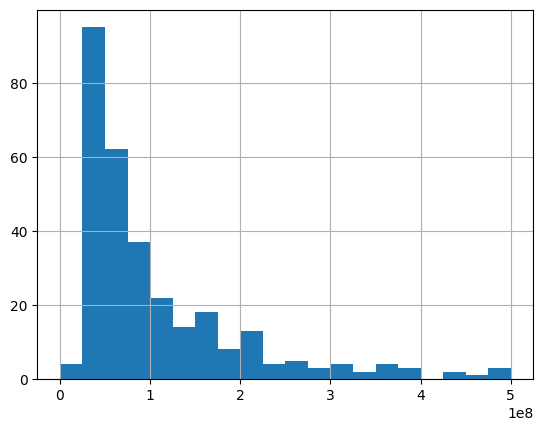

In [74]:
#просмотр распределения "бюджета" для диапазона от 0 до 500млн, исключая нулевые значения
df.query('budget != 0').budget.hist(bins=20, range=(0, 500e6))

<div class="alert alert-block alert-warning">

В столбце 7154 пропущенных значений.
    
Из 332-х не `nan` значений, 17 значений равны нулю.
    
Так же как и в предыдущих столбцах, изменять данные не буду
    
Скорее всего пропущенные и нулевые данные просто неизвестны.

#### Шаг 2.5. Проверка количественных значений

In [75]:
#не нашёл какой либо связи в столбцах бюджет и прочих

In [76]:
#запрос строк для столбцов refundable_support, nonrefundable_support, budget с данными не равными NaN
df.query(
    '(refundable_support.isna() == False)&(nonrefundable_support.isna() == False)&(budget.isna() == False)'
)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0,26000000,37142857,Министерство культуры,NaN,NaN,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0,28000000,40574140,Министерство культуры,4.2,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+,0,25000000,40015122,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12+,100000000,400000000,980000000,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6+,100000000,0,190000000,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12+,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,12+,0,30000000,46154000,Министерство культуры,5.9,драма,NaN


<div class="alert alert-block alert-warning">

    
Столбцы refundable_support, nonrefundable_support, budget с данными не равными NaN это одни и теже строки.
    

<div class="alert alert-block alert-info">
    
столбец `financing_source`, источник государственного финансирования.  
    
</div>

In [77]:
df.financing_source.unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [78]:
df.financing_source.isna().sum()

7152

<div class="alert alert-block alert-warning">

7154 пропущенных значений. Их нельзя установить достоверно.
Принимаю решение не трогать этот столбец.

<div class="alert alert-block alert-info">
    
столбец `ratings`, рейтинг фильма на КиноПоиске.  
    
</div>

In [79]:
df.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

<div class="alert alert-block alert-warning">

Столбец содержит пустые ячейки "nan", рейтинг фильма в формате 0...10, и рейтинг фильма в формате 0...100%.
    
Приведу формат к виду 0...10

In [80]:
#количество пропущенных значений
df.ratings.isna().sum()

965

In [81]:
df.ratings.astype(str).unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 'nan', '8.2', '7.5', '6.7', '7.9', '5.9', '6.2',
       '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5',
       '5.1', '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4',
       '2.6', '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2',
       '4.7', '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4',
       '3.1', '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2',
       '3.4', '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%',
       '90%', '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2',
       '1.7', '9.0', '98%', '8.9', '9.1'], dtype=object)

In [82]:
#функция для преобразования рейтинга вида '89%' в число 8,9
def percent_to_number(x):
    lengt = len(x) 
    if x[-1] == '%':
        x = int(x[0:len(x)-1])
        x /= 10
        
    return x        

In [83]:
#проверка функции
percent_to_number('85%')

8.5

In [84]:
df.ratings = df.ratings.apply(lambda x: x if pd.isnull(x) else percent_to_number(x))

In [85]:
#проверка
df.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 9.9, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', 2.8, '3.7', '1.4', '3.1', 9.7, '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', 8.3,
       6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, '1.0', 8.9, '1.3', '1.9',
       '1.8', '1.2', '1.7', '9.0', 9.8, '8.9', '9.1'], dtype=object)

In [86]:
#изменение типа на float
df.ratings = df.ratings.astype(float)

In [87]:
df.ratings.describe()

count    6519.000000
mean        6.488173
std         1.114638
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64

<Axes: >

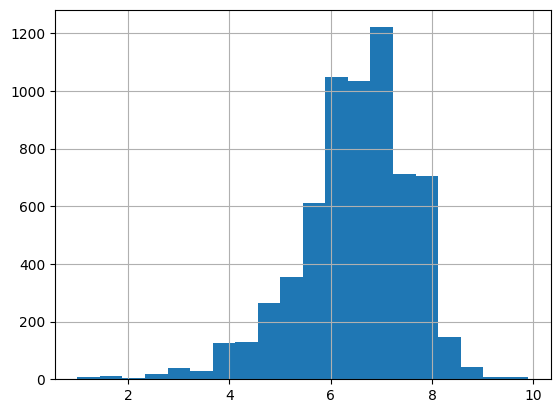

In [88]:
df.ratings.hist(bins=20)

<div class="alert alert-block alert-warning">

Примерно 7я часть столбца не содержит значений. Заполнить их медианой наверное будет не корректно, т.к. фильмы имеют разный рейтинг и данные могут исказиться

<div class="alert alert-block alert-info">
    
столбец `box_office`, сборы в рублях.  
    
</div>

In [89]:
#количество пропусков
df.box_office.isna().sum()

4326

In [90]:
df.box_office.describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

<Axes: >

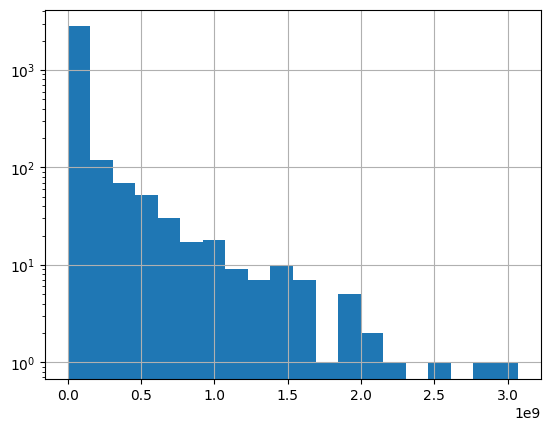

In [91]:
#просмотр распределения кассовых сборов в лог масштабе
df.box_office.hist(bins=20, log=True)#, range=(0, 1e6))

In [92]:
#количество нулевых значений
df.query('box_office == 0').box_office.count()

24

#### Шаг 2.6. Добавление новых столбцов

<div class="alert alert-block alert-info">
    
Добавление столбца `year_distrib` о годе проката фильма  
    
</div>

In [93]:
df['year_distrib'] = df.show_start_date.dt.year.astype('Int16')

In [94]:
df.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_distrib
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",NaN,2016


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   Int32              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7466 non-null   object             
 5   production_country     7482 non-null   object             
 6   director               7484 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    Int32              
 10  nonrefundable_support  332 non-null    Int32              
 11  budget                 332 non-null    Int64            

<div class="alert alert-block alert-info">
    
Добавление столбцов
    
`name_director` - с именем и фамилией главного режиссёра
    
`primary_genre`  - основным жанром фильма
    
</div>

In [96]:
#функция разделяет строку по запятым, преобразует в список и отбирает первый элемент в списке
def first_elem(x):
    try:
        return x.split(',')[0]
    except:
        return x

In [97]:
#проверка работы функции

#y = 'А.Аманшаев, Г.Шенгелия'
#y = 'А.Андрианов'
y = 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано '
#y = np.nan
first_elem(y)

'А.Андризани'

In [98]:
#добавление столбца 'имя фамилия' главного режиссёра
df['name_director'] = df.director.apply(first_elem)

In [99]:
#добавление столбца 'основной жанр' фильма
df['primary_genre'] = df.genres.apply(first_elem)

In [100]:
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   Int32              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7466 non-null   object             
 5   production_country     7482 non-null   object             
 6   director               7484 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    Int32              
 10  nonrefundable_support  332 non-null    Int32              
 11  budget                 332 non-null    Int64            

In [101]:
#проверка
df.head(4)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_distrib,name_director,primary_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

<div class="alert alert-block alert-info">
    
Добавление столбца `part_budget`. Расчёт доли государственной поддержки от общего бюджета фильма

    
</div>

In [102]:
#получает на вход всю строку, возвращает отношение (возвратные средства + невозвратные)/ общий бюджет фильма
def share_calc(string):
    try:
        return (string.refundable_support + string.nonrefundable_support) / string.budget
    except:
        return np.nan
    

In [103]:
#просмотр некоторых строк, имеющих NaN  и числовые значения
df.loc[7464:7467]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_distrib,name_director,primary_genre
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12+,100000000,400000000,980000000,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история
7465,Fair play (Честная игра),211055919,2019-12-17 12:00:00+00:00,Художественный,ИП Сигал Екатерина Тенгизовна,Россия,Д.Кудрявцев,Е.Сигал,16+,<NA>,<NA>,<NA>,NaN,6.3,"боевик,триллер,драма",NaN,2019,Д.Кудрявцев,боевик
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6+,100000000,0,190000000,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм
7467,Жёлтый клевер,111022219,2019-12-27 12:00:00+00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),12+,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,2019,Л.Соломатина (Томилова),NaN


In [104]:
#проверка работы функции
share_calc(df.loc[7464:7467])

7464    0.510204
7465        <NA>
7466    0.526316
7467        <NA>
dtype: Float64

In [105]:
#добавление колонки 'part_budget'
df['part_budget'] = df.apply(share_calc, axis=1)

In [106]:
#изменение на тип float64
df['part_budget'] = pd.to_numeric(df['part_budget'],errors = 'ignore')

In [107]:
#проверка изменений
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   Int32              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7466 non-null   object             
 5   production_country     7482 non-null   object             
 6   director               7484 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    Int32              
 10  nonrefundable_support  332 non-null    Int32              
 11  budget                 332 non-null    Int64            

In [108]:
#проверка на nan
df.part_budget.isna().sum()

7169

In [109]:
#просмотр максимальной доли
df.part_budget.max()

0.7847452486493143

In [110]:
#проверка данных
df.part_budget.describe()

count    315.000000
mean       0.517386
std        0.170043
min        0.044043
25%        0.373458
50%        0.592265
75%        0.656931
max        0.784745
Name: part_budget, dtype: float64

<Axes: >

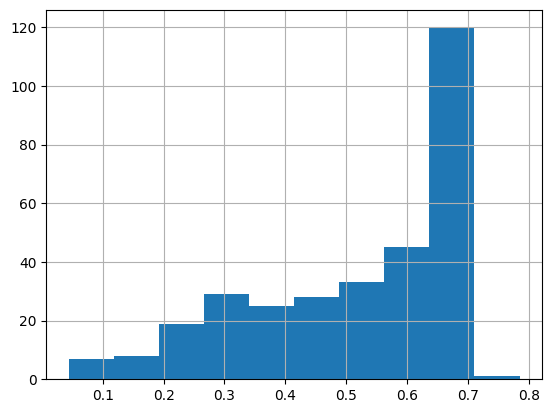

In [111]:
df.part_budget.hist()

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

<div class="alert alert-block alert-info">
    
Количество фильмов вышедших в прокат каждый год. 

    
</div>

<Axes: xlabel='year_distrib'>

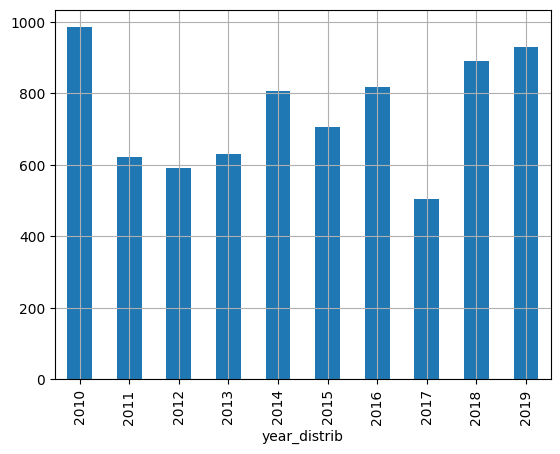

In [112]:
df.groupby('year_distrib')['year_distrib'].count().plot(kind='bar', grid=True)

<div class="alert alert-block alert-warning">
    
Видно, что больше всего фильмов показано было в 2010, 2019 и 2018 годах
</div>

<div class="alert alert-block alert-warning">

В таблице нет пропусков в колонках

    puNumber — номер прокатного удостоверения;
    show_start_date — дата премьеры фильма;
    
Значит во всем мире прокат всех указанных фильмов состоялся.
    
В изначальной таблице `mkrf_shows` есть сведения о показах фильмов в российских кинотеатрах. 
По всей видимости, исследование стоит проводить исходя из этих данных.

Колонка `box_office` содержит сборы в рублях для фильмов показанных в российских кинотеатрах и не имеет пропусков.
Для дальнейшего иссоледования буду использовать её.
</div>

<div class="alert alert-block alert-info">
    

Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [113]:
#расчёт доли фильмов известными данными о прокате
len(shows) / len(df)

0.4219668626402993

<div class="alert alert-block alert-warning">
    
Примерно 42% фильмов о которых есть информация о прокате в рос.кинотеатрах
</div>

<div class="alert alert-block alert-info">
    
Проанализируйте, как эта доля менялась по годам.

In [114]:
#выборка только тех значений которые не NaN, в столбце box_office (это те фильмы о которых есть данные о прокате в россии)
#группировка по году и подсчёт доли (в %) от общего количества 7486
rus_table = (
    df.query('~(box_office != box_office)')
    .groupby('year_distrib')
    .agg({"year_distrib": ['count', lambda x: 100*x.count()/7486]})
#    .rename(columns={'<lambda_0>':'percent_share'})
    
)    

In [115]:
rus_table.columns = ['count', 'percent_share']

In [116]:
rus_table

,count,percent_share
year_distrib,,
2010,105,1.402618
2011,109,1.456051
2012,128,1.709858
2013,184,2.457921
2014,279,3.726957
2015,465,6.211595
2016,526,7.026449
2017,357,4.768902
2018,475,6.345178


<Axes: xlabel='year_distrib'>

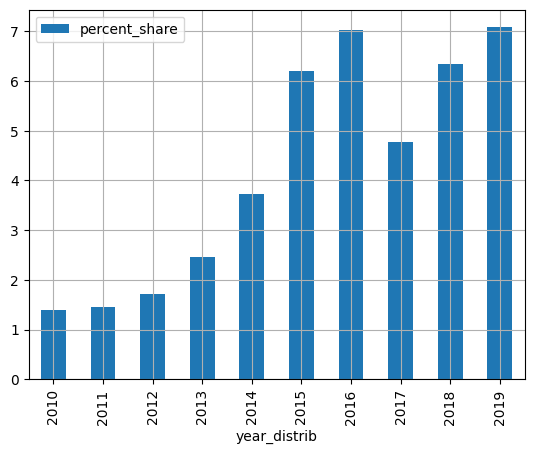

In [117]:
rus_table.plot(kind='bar', y='percent_share', grid=True)

In [118]:
#расчёт средней доли для 2015...2019 годов
rus_table.query('year_distrib >= 2015')['percent_share'].mean()

6.286401282393801

In [119]:
#следующая итерация таблицы
rus_table = df.groupby('year_distrib').agg({'title':'count', 'box_office':'count'})

In [120]:
rus_table.columns

Index(['title', 'box_office'], dtype='object')

In [121]:
rus_table['divide'] = rus_table.title / rus_table.box_office

In [122]:
rus_table

,title,box_office,divide
year_distrib,,,
2010,985,105,9.380952
2011,622,109,5.706422
2012,592,128,4.625000
2013,630,184,3.423913
2014,806,279,2.888889
2015,705,465,1.516129
2016,818,526,1.555133
2017,505,357,1.414566
2018,891,475,1.875789


In [123]:
#ещё одна итерация таблицы V2
rus_table = df.groupby('year_distrib').agg({'title':'count'})

In [124]:
#добавление колонки с долей фильмов
rus_table['share_films'] = rus_table.title/len(df.title)

In [125]:
rus_table

,title,share_films
year_distrib,,
2010,985,0.131614
2011,622,0.083111
2012,592,0.079102
2013,630,0.084180
2014,806,0.107696
2015,705,0.094201
2016,818,0.109300
2017,505,0.067477
2018,891,0.119054


<Axes: xlabel='year_distrib'>

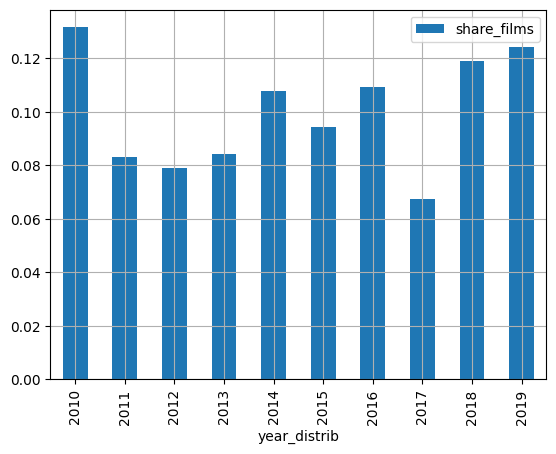

In [126]:
rus_table.plot(y ='share_films', kind='bar', grid=True)

<div class="alert alert-block alert-warning">

**V2 выводы**
    
Максимальная доля фильмов наблюдалась в 2010м году, около 13%. В последующие годы, 2011, 2012, 2013 произошло сильное падение доли фильмов до уровня примерно 8%. 
    
Три следующих года 2014, 2015, 2016 наблюдается небольшое поднятие доли фильмов до примерно 10%.

В 2017 самый сильный провал 6,7%.
    
2018 и 2019 поднятие практически до уровня 2010го года, около 12%
    
</div>

<div class="alert alert-block alert-warning">
    
Согласно графику, доля проката увеличивалась с 1,4% (2010й год) по 6,2% (2015й). 
    
С 2015 по 2019 доля проката в рос. кинотеатрах в среднем оставалась одинаковой 6.3%
</div>

<div class="alert alert-block alert-warning">
    
Из этих данных не ясно, какой какой период полнее всего представлен в данных. В разные годы разное количество показов фильмов
</div>

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<div class="alert alert-block alert-info">
    
Расчёт суммы сборов по годам

In [127]:
summ_rus = (
    df.query('~(box_office != box_office)')
    .groupby('year_distrib')
    .agg({"box_office": ['count', 'sum']})

)

In [128]:
summ_rus.columns=['count', 'summ']

In [129]:
summ_rus

,count,summ
year_distrib,,
2010,105,2.428654e+06
2011,109,1.410276e+07
2012,128,6.955423e+06
2013,184,2.979971e+07
2014,279,7.444952e+09
2015,465,3.949737e+10
2016,526,4.786630e+10
2017,357,4.856371e+10
2018,475,4.966840e+10


<Axes: xlabel='year_distrib'>

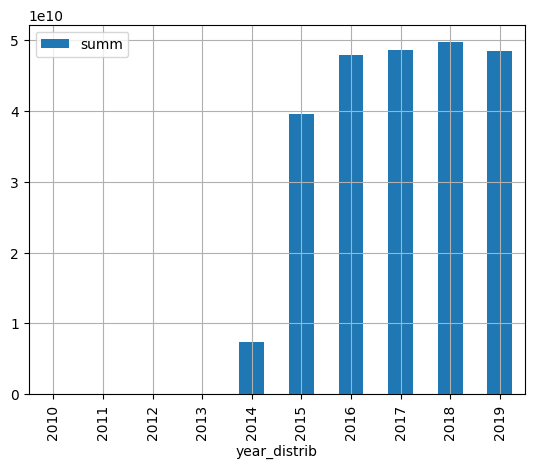

In [130]:
summ_rus.plot(y='summ', kind='bar', grid=True)

In [131]:
#минимальная сумма сборов в год
summ_rus.query('summ == summ.min()')

,count,summ
year_distrib,,
2010,105,2428654.0


In [132]:
#максимальная сумма сборов в год
summ_rus.query('summ == summ.max()')

,count,summ
year_distrib,,
2018,475,4.966840e+10


<div class="alert alert-block alert-warning">


С 2010 по 2013 включительно сумма сборов не превышала 30 млн.руб за каждый год.
    
2014 й год стал "переломным" сборы составили 7,4 млрд.руб.
    
2015 й и по 2019 сборы сильно возрасли и составили от 40 до 50 млрд.руб.

</div>

<div class="alert alert-block alert-warning">


Минимальные сборы были в 2010м году и составили 2428654 рублей
    
Максимальные сборы были в 2018м, составили примерно 49,67 млрд.рубл.

</div>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. 

- Сравните значения и сделайте выводы.

In [133]:
pivot_box_office = (

 df.query('~(box_office != box_office)')
    .pivot_table(index=['year_distrib'], values='box_office', aggfunc=('mean', 'median'))

)

In [134]:
pivot_box_office

,mean,median
year_distrib,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


In [135]:
#добавление столбца с 10ти кратным увеличением колонки "median"
pivot_box_office['median_10'] = pivot_box_office['median'] * 10

In [136]:
pivot_box_office

,mean,median,median_10
year_distrib,,,
2010,2.313004e+04,1700.000,17000.00
2011,1.293832e+05,3000.000,30000.00
2012,5.433924e+04,5660.000,56600.00
2013,1.619549e+05,3522.500,35225.00
2014,2.668442e+07,18160.000,181600.00
2015,8.494057e+07,4920933.000,49209330.00
2016,9.100057e+07,3846679.410,38466794.10
2017,1.360328e+08,9968340.000,99683400.00
2018,1.045651e+08,8891102.210,88911022.10


<Axes: xlabel='year_distrib'>

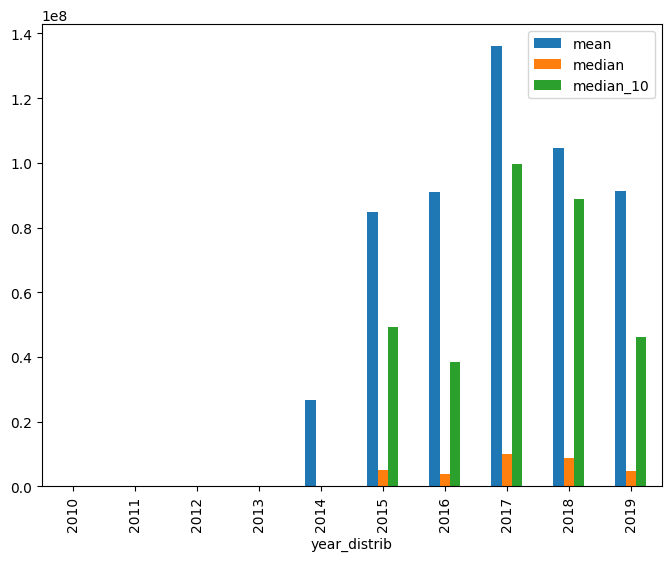

In [137]:
pivot_box_office.plot(kind='bar', figsize=(8, 6))

<div class="alert alert-block alert-warning">

Видно, что среднее значение кассовых сборов по годам минимум на порядок больше чем медианное.
    
Такая разница говорит о том, что в годовой выборке есть фильмы которые имеют кассовые сборы намного больше чем основная масса фильмов.
</div>

<div class="alert alert-block alert-info">
    
Просмотр информации для отдельно выбранного 2017го года

In [138]:
#просмотр информации для 2017 года
df.query('~(box_office != box_office)&(year_distrib == 2017)').box_office.describe()

count    3.570000e+02
mean     1.360328e+08
std      3.232514e+08
min      7.900000e+03
25%      1.951257e+06
50%      9.968340e+06
75%      7.117383e+07
max      2.779686e+09
Name: box_office, dtype: float64

<div class="alert alert-block alert-warning">

Для 2017го года например, медиана кассовых сборов около 10млн.руб, при этом в выборке есть фильмы которые собрали в прокате почти 3 млрд.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? 

- Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 

- Меняется ли картина в зависимости от года? 

- Если да, предположите, с чем это может быть связано.

<div class="alert alert-block alert-info">
    
Ислледование по возрастной категории фильма на сборы с 2015го по 2019й

<div class="alert alert-block alert-info">
    
Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?

In [139]:
#фильтрация фильмов с 2015го по 2019
df_2015_2019 = df.query('2015 <= year_distrib <= 2019')

In [140]:
#проверка
df_2015_2019.year_distrib.unique()

<IntegerArray>
[2015, 2016, 2017, 2018, 2019]
Length: 5, dtype: Int16

In [141]:
df_2015_2019.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_distrib,name_director,primary_genre,part_budget
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN


In [142]:
#проверка
df.age_restriction.unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

In [143]:
#добавление столбца с возрастной категорией типа int
df_2015_2019['age_int'] = df_2015_2019['age_restriction'].apply(lambda x: x[:-1])

/tmp/ipykernel_8026/1097658516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015_2019['age_int'] = df_2015_2019['age_restriction'].apply(lambda x: x[:-1])


In [144]:
#изменение на int
df_2015_2019['age_int'] = df_2015_2019['age_int'].astype(int)

/tmp/ipykernel_8026/2369868547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015_2019['age_int'] = df_2015_2019['age_int'].astype(int)


In [145]:
#проверка
df_2015_2019['age_int'].unique()

array([18,  6, 16, 12,  0])

In [146]:
#проверка
df_2015_2019[['age_restriction', 'age_int']]

,age_restriction,age_int
0,18+,18
1,6+,6
2,18+,18
3,18+,18
4,18+,18
...,...,...
7481,12+,12
7482,16+,16
7483,0+,0
7484,0+,0


In [147]:
#группировка по возрасту и подсчёт значений по кассовым сборам
df_2015_2019_groupby = (
    df_2015_2019.groupby('age_int')
    .agg({"box_office": ['sum', 'mean', 'count']})
    #.sort_values(by='age_restriction', ascending=True, key=lambda x: x.replace('+','').astype(int))
)

In [148]:
df_2015_2019_groupby.columns

MultiIndex([('box_office',   'sum'),
            ('box_office',  'mean'),
            ('box_office', 'count')],
           )

In [149]:
#переименование столбцов
df_2015_2019_groupby.columns = ['sum', 'median', 'count']

In [150]:
#просмотр таблицы
df_2015_2019_groupby#.sort_values(by='age_cat')

,sum,median,count
age_int,,,
0,8.090774e+08,8.890961e+06,91
6,5.579861e+10,1.760209e+08,317
12,6.061945e+10,1.741938e+08,348
16,7.603473e+10,9.445309e+07,805
18,4.075962e+10,5.146416e+07,792


<Axes: xlabel='age_int'>

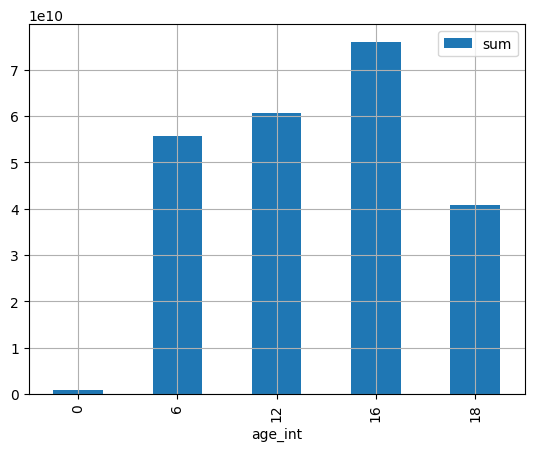

In [151]:
#таблица суммы проката по возрастным категориям
df_2015_2019_groupby.plot(y='sum', kind='bar', grid=True)

<div class="alert alert-block alert-warning">

В период с 2015 по 2019 год, наибольшие сборы принесли фильмы для возрастной категории "16+".

<div class="alert alert-block alert-info">
    
Меняется ли картина в зависимости от года? 
Проверка от года и возрастной категории

In [152]:
df_2015_2019_group_year = (
    df_2015_2019.groupby(['year_distrib', 'age_int'])
    .agg({"box_office": ['sum', 'mean', 'count']})
    
)

In [153]:
df_2015_2019_group_year.columns

MultiIndex([('box_office',   'sum'),
            ('box_office',  'mean'),
            ('box_office', 'count')],
           )

In [154]:
df_2015_2019_group_year.columns = ['sum', 'mean', 'count']

In [155]:
df_2015_2019_group_year = df_2015_2019_group_year.reset_index()

In [156]:
df_2015_2019_group_year

,year_distrib,age_int,sum,mean,count
0,2015,0,3.790546e+08,9.719348e+06,39
1,2015,6,8.701799e+09,1.641849e+08,53
2,2015,12,1.361608e+10,1.865217e+08,73
3,2015,16,1.136812e+10,6.766739e+07,168
4,2015,18,5.432308e+09,4.115385e+07,132
5,2016,0,1.502288e+08,3.664118e+06,41
6,2016,6,1.205315e+10,1.721878e+08,70
7,2016,12,1.220445e+10,1.488347e+08,82
8,2016,16,1.666455e+10,9.156345e+07,182
9,2016,18,6.793930e+09,4.499291e+07,151


<Axes: xlabel='year_distrib'>

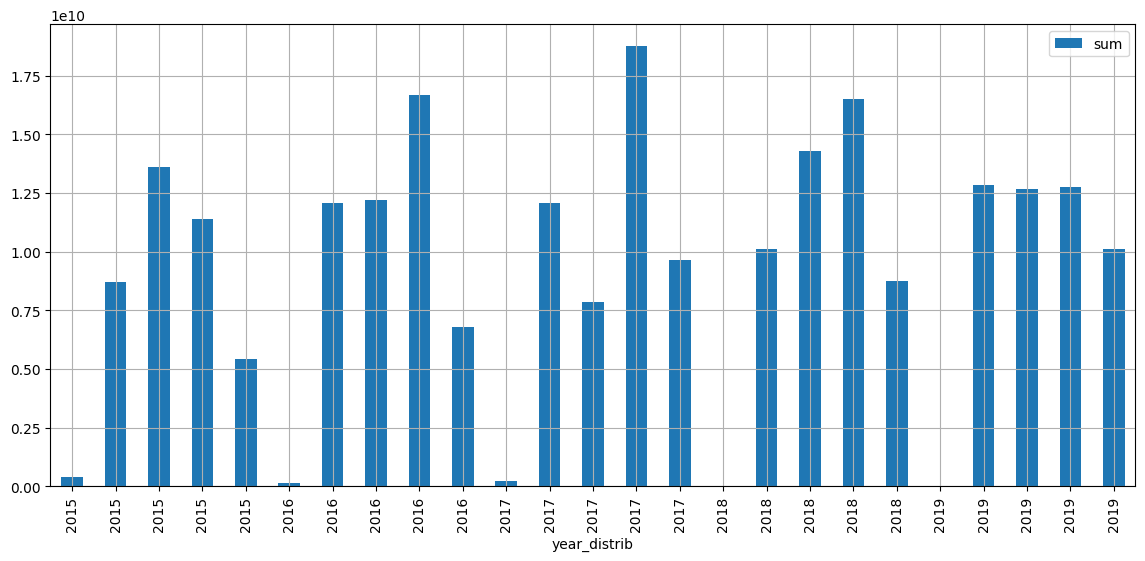

In [157]:
df_2015_2019_group_year.plot(x=('year_distrib'), y='sum', kind='bar', grid=True, figsize=(14, 6))

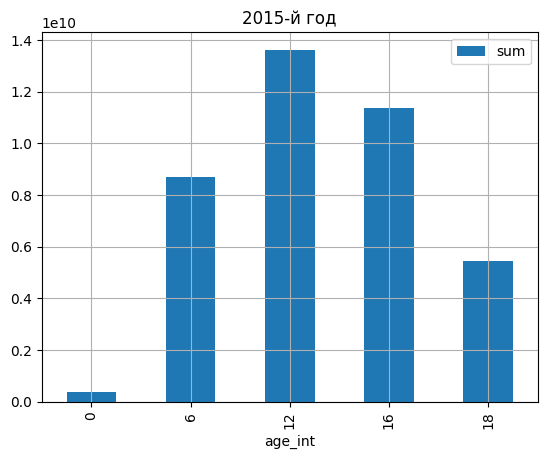

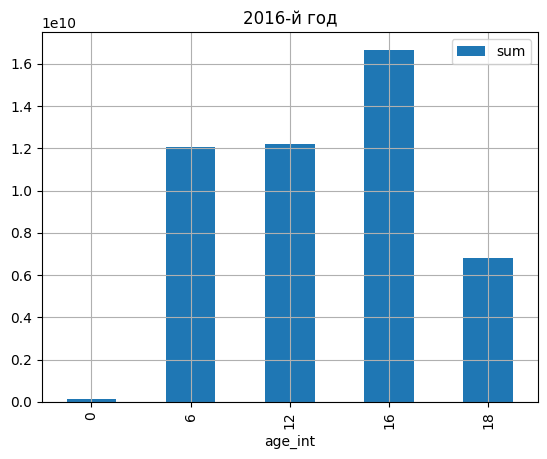

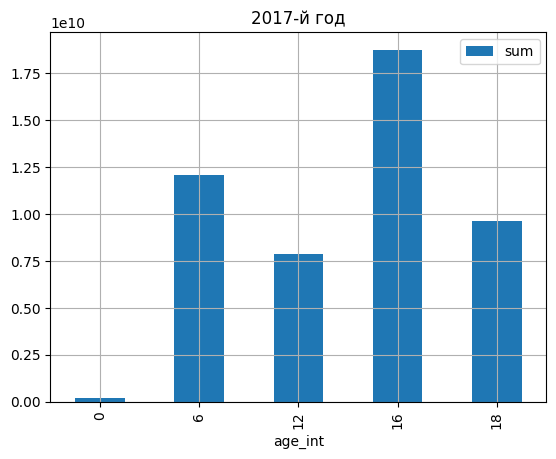

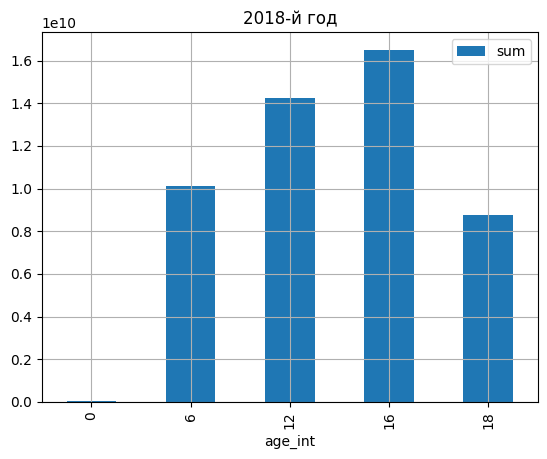

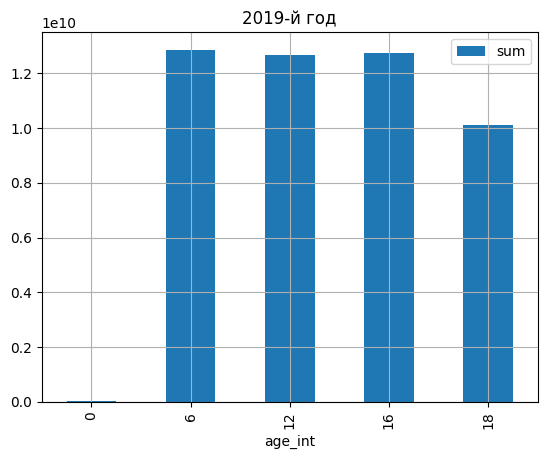

In [158]:
#другой вариант графика распределения по возрастным категориям, в зависимости от года
for j in [2015, 2016, 2017, 2018, 2019]:
    (
    df_2015_2019_group_year
    #.loc[df_2015_2019_group_year.index.get_level_values('year_distrib') == 2019]
    .query('year_distrib == @j')
    .plot(x='age_int', y='sum', kind='bar', grid=True, title=str(j)+'-й год')
    )

<div class="alert alert-block alert-info">
    
с чем это может быть связано?

<div class="alert alert-block alert-warning">

    
Фильмы категории"12+" 2015й года по сборам обгоняли другие года, с 2016 картина изменилась и максимальные сборы получили фильмы категории "16+". 
    
Ощущение что связано это с тем, что это теже самые зрители, которые повзрослели и перешли в другую категорию.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [159]:
#новый датафрейм с строками refundable_support и nonrefundable_support не NaN
df_state_support = df.query('~refundable_support.isna()')

In [160]:
#проверка
df_state_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    Int32              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    Int32              
 10  nonrefundable_support  332 non-null    Int32              
 11  budget                 332 non-null    Int64          

In [161]:
#добавление столбца с общей суммой гос поддержки
df_state_support['total_amount'] = df_state_support.refundable_support + df_state_support.nonrefundable_support

/tmp/ipykernel_8026/478122776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_support['total_amount'] = df_state_support.refundable_support + df_state_support.nonrefundable_support


In [162]:
#добавление столбца с отношением кассовых сборов к общей сумме гос поддержки
df_state_support['ratio_box_supp'] = (
    df_state_support.box_office / 
    (df_state_support.refundable_support + df_state_support.nonrefundable_support)
)

/tmp/ipykernel_8026/353854201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_support['ratio_box_supp'] = (


In [163]:
#проверка
df_state_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    Int32              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    Int32              
 10  nonrefundable_support  332 non-null    Int32              
 11  budget                 332 non-null    Int64          

<Axes: ylabel='Frequency'>

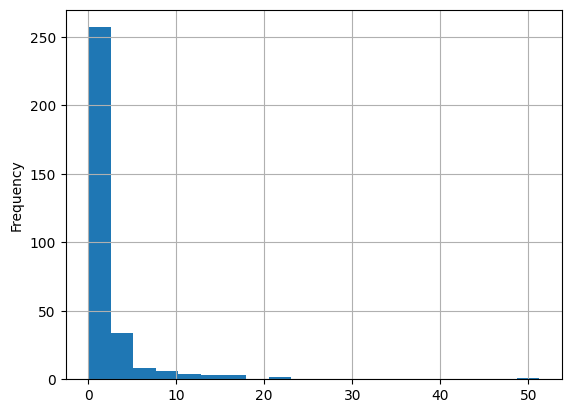

In [164]:
#гистограмма отношения кассовых сборов к общей сумме гос поддержки
(
    df_state_support
    .ratio_box_supp
    .plot(y='ratio_box_supp', kind='hist', bins=20, grid=True)
)

In [165]:
#количество фильмов с коэффициентом меньше 1
df_state_support.query('ratio_box_supp < 1').ratio_box_supp.count()

200

<div class="alert alert-block alert-warning">

Из 332 х фильмов получвших господдержку, 200 собрали средств меньше чем получили. 

То есть 2/3 фильмов не окупаются и убыточны в этом отношении.

<div class="alert alert-block alert-info">
    
Проверка зависимости рейтинга фильма от суммарной господдержки

<Axes: xlabel='total_amount', ylabel='ratings'>

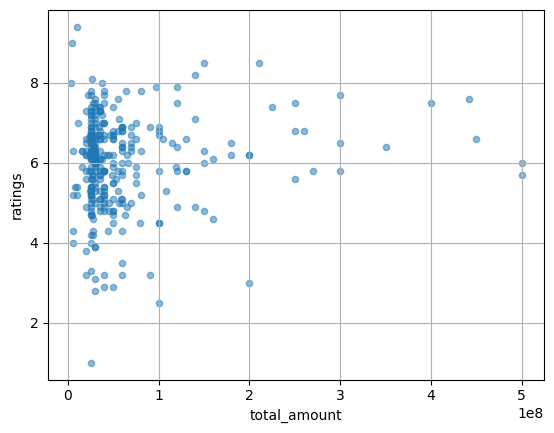

In [166]:
df_state_support.plot(x='total_amount', y='ratings', kind='scatter', grid=True, alpha=0.5)

<div class="alert alert-block alert-warning">

Не видно зависимости рейтинга фильма от затраченных средств господдержки

In [167]:
#медианный рейтинг по типам фильмов
(
    df_state_support.groupby(['type'])
    .agg({'ratings': ['median', 'count']})
    .sort_values(by=[('ratings', 'median')], ascending=False)
)

ratings      
                median count
type                        
Документальный    8.00     1
Художественный    6.20   285
Анимационный      6.15    30

<Axes: xlabel='ratio_box_supp', ylabel='ratings'>

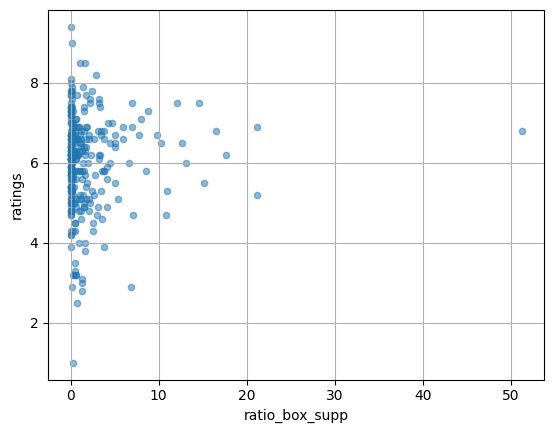

In [168]:
df_state_support.plot(x='ratio_box_supp', y='ratings', kind='scatter', grid=True, alpha=0.5)

In [169]:
#фильмы с рейтингом больше 8
df_state_support.query('ratings > 8')#.ratings.count()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_distrib,name_director,primary_genre,part_budget,total_amount,ratio_box_supp
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0,...,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703,26500000,0.013787
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,12+,50000000,...,Фонд кино,8.5,"драма,военный,история",249166767.7,2015,Р.Давлетьяров,драма,0.680000,150000000,1.661112
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,6+,0,...,Министерство культуры,9.4,"фантастика,боевик,комедия",334750.0,2015,Ю.Кара,фантастика,0.250000,10000000,0.033475
3139,Я умею вязать,111019615,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",16+,0,...,Министерство культуры,9.0,драма,801370.0,2015,Н.Степанова при участии С.Иванова,драма,0.324979,4700000,0.170504
3627,БОЛЬШОЙ,111017416,2016-11-22 12:00:00+00:00,Художественный,"ЗАО ""ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО""",Россия,В.Тодоровский,"В.Тодоровский, А.Златопольский",12+,10000000,...,Фонд кино,8.5,"криминал,комедия,боевик",228578204.0,2016,В.Тодоровский,криминал,0.656250,210000000,1.088468
6855,Миллиард,111006719,2019-04-17 12:00:00+00:00,Художественный,"ООО ""Медиа Юниверсал Ивент""",Россия,Р.Прыгунов,"В.Маслов, В.Верещагин, Б.Анисимов",12+,0,...,Фонд кино,8.2,драма,408646665.7,2019,Р.Прыгунов,драма,0.583233,140000000,2.918905


In [170]:
#количество фильмов с рейтингом больше 9
df_state_support.query('ratings > 9')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_distrib,name_director,primary_genre,part_budget,total_amount,ratio_box_supp
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,6+,0,...,Министерство культуры,9.4,"фантастика,боевик,комедия",334750.0,2015,Ю.Кара,фантастика,0.25,10000000,0.033475


<div class="alert alert-block alert-warning">

Всего 6 фильмов из 332-х имеют рейтинг больше 8ми, при этом эти фильмы имеют очень разное соотношение сборы/господдержка.
    
А рейтинг больше 9-ти имеет всего один фильм.

<div class="alert alert-block alert-info">
    
## Поиски интересных закономерностей
    
(во всём датафрейме)

<div class="alert alert-block alert-info">
    
Какая страна больше всех выпускает фильмы с рейтингом 5 и ниже?

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   Int32              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7466 non-null   object             
 5   production_country     7482 non-null   object             
 6   director               7484 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    Int32              
 10  nonrefundable_support  332 non-null    Int32              
 11  budget                 332 non-null    Int64            

In [172]:
(
    df.query('ratings <= 5')
    .groupby('production_country')
    .agg({'title': ['count']})
    .sort_values(by=[('title', 'count')], ascending=False)
)

,title
,count
production_country,
Россия,248
США,165
Франция,18
Великобритания,17
КНР,11
...,...
Новая Зеландия,1
Мексика - США,1


<div class="alert alert-block alert-warning">

По количеству фильмов с низким рейтингом Россия на первом месте

<div class="alert alert-block alert-info">
    
Просмотр доли таких фильмов из всех выпускаемых в стране

In [173]:
(
    df.query('ratings <= 5 & production_country == "Россия"').ratings.count() /
    df.query('production_country == "Россия"').ratings.count()
    #.groupby('production_country')
    #.agg({'title': ['count']})
    #.sort_values(by=[('title', 'count')], ascending=False)
)

0.19135802469135801

<div class="alert alert-block alert-info">

Примерно 20% доля фильмов с рейтингом 5 и менее в России, за все года.
</div>

<div class="alert alert-block alert-info">
    
Какая страна больше всех выпускает фильмы с рейтингом 8 и выше?

In [174]:
(
    
    df.query('ratings >= 8')
    .groupby('production_country')
    .agg({'title': ['count']})
    #.columns
    .sort_values(by=[('title', 'count')], ascending=False)
)

,title
,count
production_country,
США,102
Россия,82
СССР,49
Великобритания,17
США - Великобритания,17
...,...
Нидерланды - США - Германия - Канада - Франция - Ирландия - Великобритания,1
Нидерланды,1


<div class="alert alert-block alert-warning">

По количеству фильмов с высоким рейтингом США на первом месте, а Россия на втором

<div class="alert alert-block alert-info">
    
Как зависит медианный рейтинг фильмов от возрастной группы?
Вид распределения рейтинга

In [175]:
(
    df.groupby(['age_restriction'])
    #.plot(y='ratings', kind='hist', bins=20, use_index=True)
    #.boxplot(column='ratings', figsize=(12, 12), grid=True)
    .agg({'ratings': ['median', 'count']})
)   
#None

ratings      
                 median count
age_restriction              
0+                  6.9   468
12+                 6.8  1348
16+                 6.6  2663
18+                 6.4  1512
6+                  6.7   528

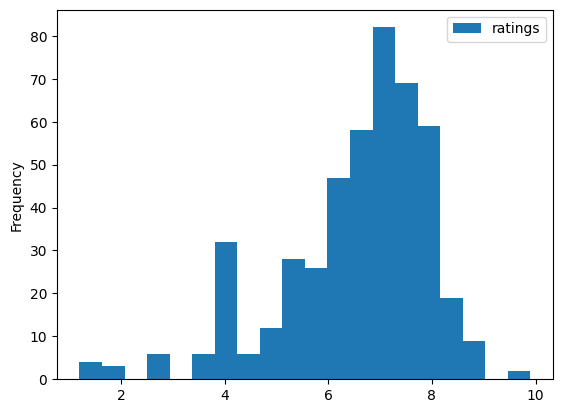

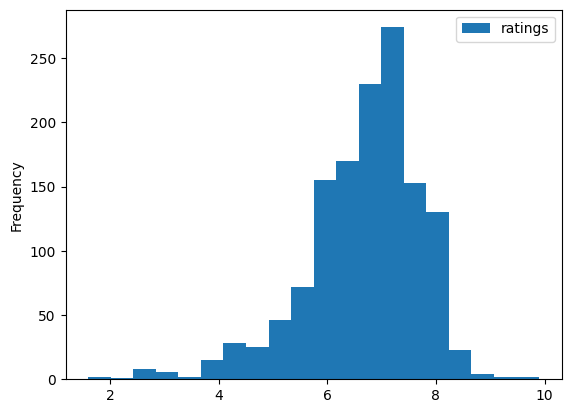

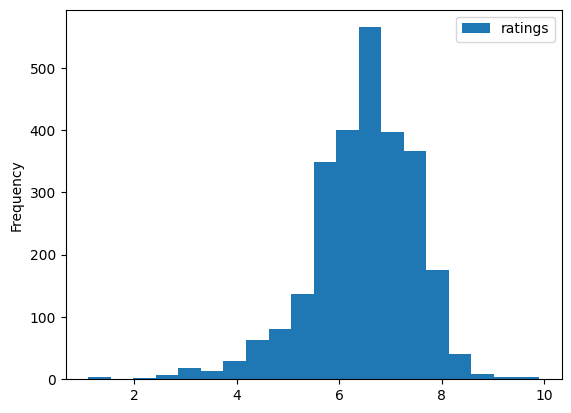

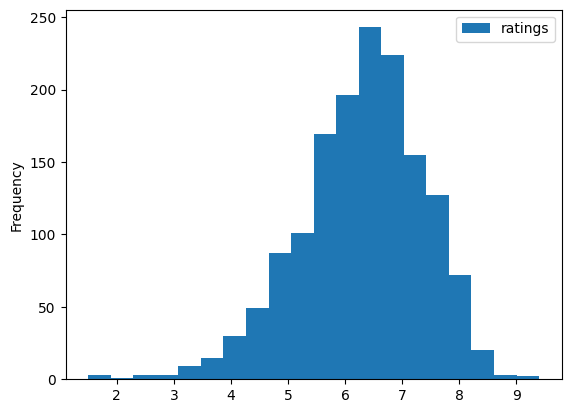

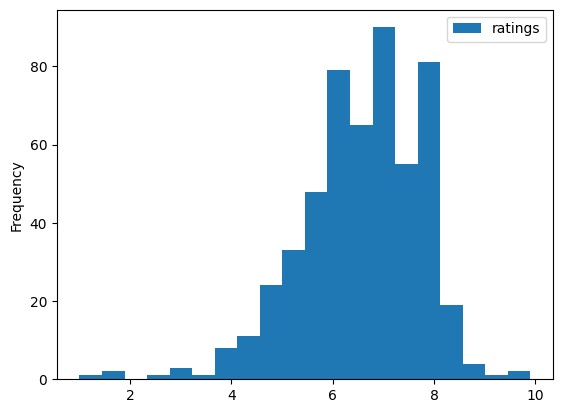

In [176]:
(
    df.groupby(['age_restriction'])
    .plot(y='ratings', kind='hist', bins=20)#, use_index=True)
    #.boxplot(column='ratings', figsize=(12, 12), grid=True)
)   
None

<div class="alert alert-block alert-warning">

Фильмы "0+" имеют больший медианный рейтинг чем остальные категории.

<div class="alert alert-block alert-info">
    
Как зависит медианный рейтинг фильмов от типа фильма?


In [177]:
df.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [178]:
df.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_distrib,name_director,primary_genre,part_budget
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN


In [179]:
(
    df.groupby(['type'])
    .agg({'ratings': ['median', 'count']})
    .sort_values(by=[('ratings', 'median')], ascending=False)
)

ratings      
                            median count
type                                    
Научно-популярный              7.3    35
Прочие                         7.2   210
Документальный                 7.1   162
Музыкально-развлекательный     6.9     1
Художественный                 6.6  5540
Анимационный                   6.5   571

<div class="alert alert-block alert-warning">

Максимальный рейтинг имеют фильмы категории "Научно-популярный"

### Шаг 5. Общий вывод

<div class="alert alert-block alert-warning">

**Проведено исследование данных о российском кинопрокате.**

Ниже приведены краткие итоги.
** **

Больше всего фильмов показано было в 2010, 2019 и 2018 годах

Примерно 42% фильмов о которых есть информация о прокате в рос.кинотеатрах
** **
Доля проката увеличивалась с 1,4% (2010й год) по 6,2% (2015й). 
С 2015 по 2019 доля проката в рос. кинотеатрах в среднем оставалась одинаковой, около 6.3%
** **
С 2010 по 2013 включительно сумма сборов не превышала 30 млн.руб за каждый год.
2014 й год стал "переломным" сборы составили 7,4 млрд.руб.
2015 й и по 2019 сборы сильно возрасли и составили от 40 до 50 млрд.руб.
Минимальные сборы были в 2010м году и составили примерно 2,4 млн. рублей
Максимальные сборы были в 2018м, составили примерно 49,67 млрд.рубл.

** **
Среднее значение кассовых сборов по годам минимум на порядок больше чем медианное.

В период с 2015 по 2019 год, наибольшие сборы принесли фильмы для возрастной категории "16+".

Фильмы категории"12+" 2015й года по сборам обгоняли другие года, с 2016 картина изменилась и максимальные сборы получили фильмы категории "16+". 

** **
**Фильмы, которые получили государственную поддержку**

Из 332 х фильмов получвших господдержку, 200 собрали средств меньше чем получили. 
Это означает что 2/3 фильмов не окупаются и убыточны в этом отношении.

Нет зависимости рейтинга фильма, от затраченных средств господдержки

Всего 6 фильмов из 332-х имеют рейтинг больше 8ми, при этом эти фильмы имеют очень разное соотношение сборы/господдержка.

А рейтинг больше 9-ти имеет всего один фильм.

** **

По количеству фильмов с низким рейтингом - Россия на первом месте.

По количеству фильмов с высоким рейтингом - США на первом месте, а Россия на втором.

Фильмы "0+" имеют больший медианный рейтинг, чем остальные категории.

Максимальный рейтинг имеют фильмы категории "Научно-популярный"